# Coastal Upwelling Transport Index Analysis Script
 

#### Import the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#read in csv
cuti = np.genfromtxt("CUTI_daily.csv", delimiter = ",")
#read the header of the columns
with open("CUTI_daily.csv", "r") as file:
    header = file.readline()
    print("Header:", header)
#filter the year and lat to match the other data (2003-2023) and (35N to 39N)
#gather the right indicies from the header columns above
#indices for filtering
year_col = 0    #yr
month_col = 1   #month
lat_cols = range(7, 12)  #lat

#filter for the correct months
spring_months = [4, 5, 6]
spring_data = cuti[np.isin(cuti[:, month_col], spring_months)]

#where it will be stored
averages = {}

#loop through each of the years
for year in range(2003, 2024):
    #filter data for that year
    year_data = spring_data[spring_data[:, year_col] == year]
    
    if year_data.size > 0:  #make sure there is data for the year
        #calc average for each latitude
        lat_averages = np.mean(year_data[:, lat_cols], axis=0)
        averages[year] = lat_averages
    else:
        #if no data exists for the year, store NaNs
        averages[year] = [np.nan] * len(lat_cols)

Header: year,month,day,31N,32N,33N,34N,35N,36N,37N,38N,39N,40N,41N,42N,43N,44N,45N,46N,47N



Now make a time series of the data for each year for each latitude to see latitudinal differences in upwelling

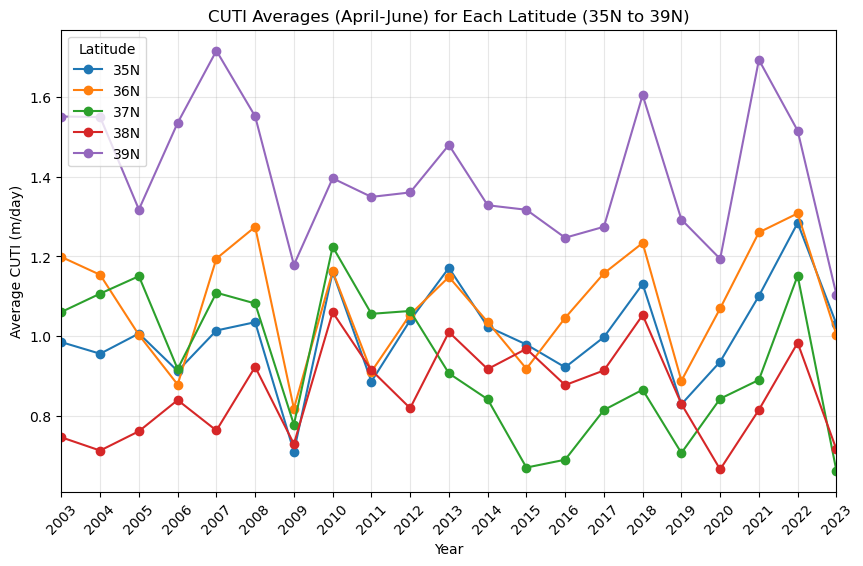

In [14]:
#naming for convience
years = np.array(list(averages.keys()))  
latitude_averages = np.array(list(averages.values())) 

#make figure
plt.figure(figsize=(10, 6))

#loop through each latitude 
latitude_labels = ["35N", "36N", "37N", "38N", "39N"]
for i in range(latitude_averages.shape[1]):
    plt.plot(years, latitude_averages[:, i], label=latitude_labels[i], marker='o')
    
#add label and legend
plt.title("CUTI Averages (April-June) for Each Latitude (35N to 39N)")
plt.xlabel("Year")
plt.ylabel("Average CUTI (m/day)")
plt.legend(title="Latitude")
plt.grid(alpha=0.3)

#custome xticks 
plt.xticks(ticks=np.arange(2003, 2024, 1), rotation = 45)
plt.xlim(2003, 2023)

#plt show
plt.show()

Now we are going to create a timeseries of all the latitudes combined 

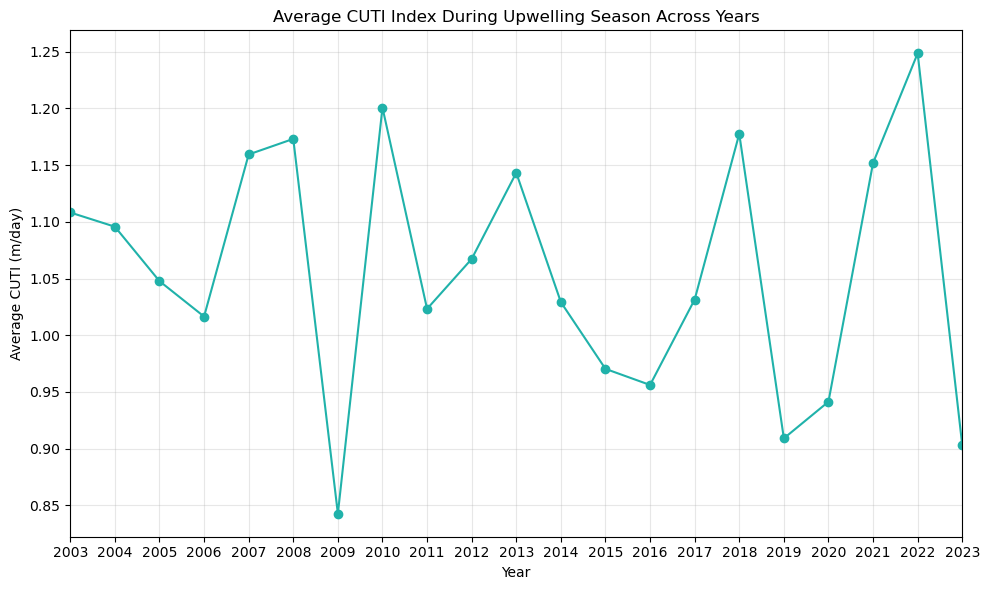

In [15]:
#calculate averages
overall_average = np.mean(latitude_averages, axis=1)

#make figure
plt.figure(figsize=(10, 6))

#plot the overall average
plt.plot(years, overall_average, label="Overall Average (35N-39N)", color="lightseagreen", marker='o')

#lables and title
plt.title("Average CUTI Index During Upwelling Season Across Years")
plt.xlabel("Year")
plt.ylabel("Average CUTI (m/day)")
plt.grid(alpha=0.3)

#custome x axis
plt.xticks(ticks=np.arange(2003, 2024, 1))
plt.xlim(2003, 2023)

#adjust layout
plt.tight_layout()

plt.show()